# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

### Importando as Bibliotecas 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

### Importando Dataframe

In [3]:
df = pd.read_csv('SINASC_RO_2019.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [9]:
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

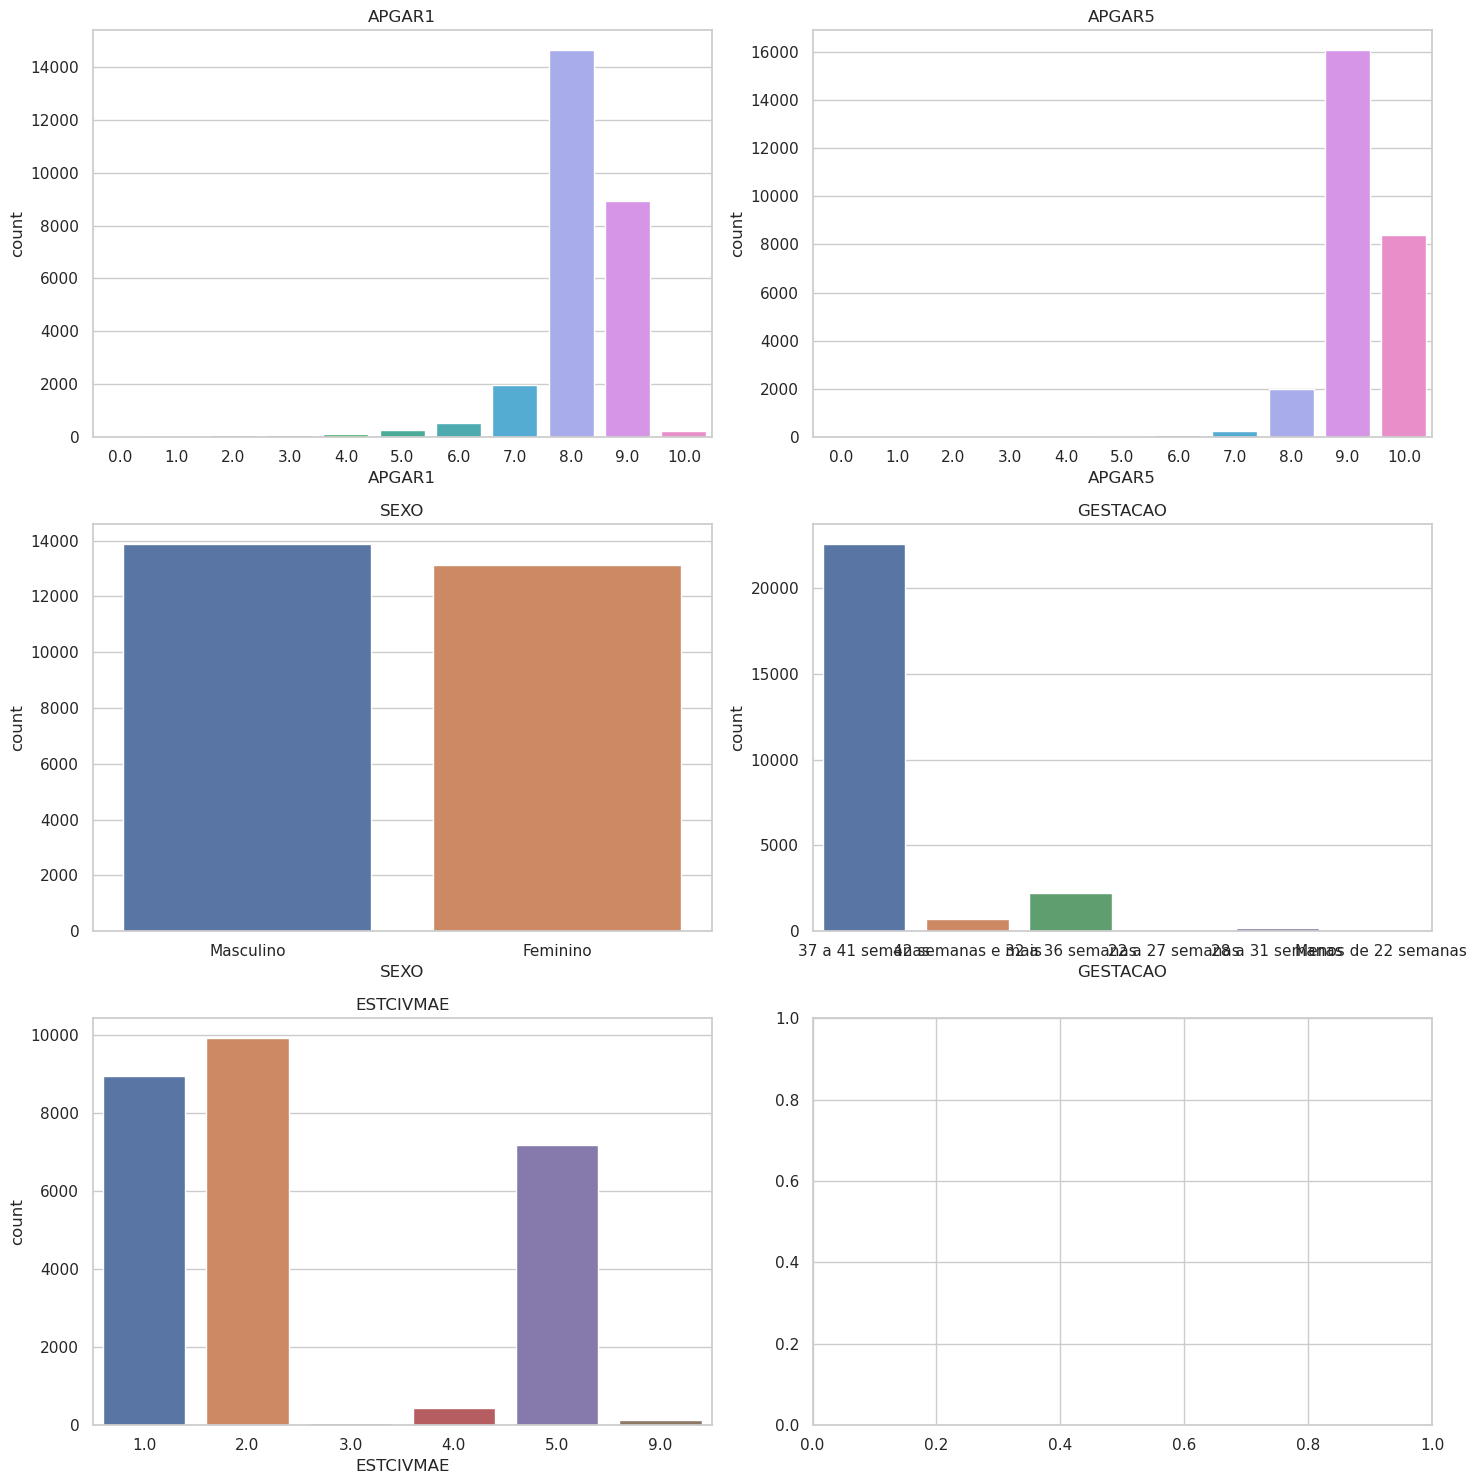

In [11]:
# Definindo o estilo do seaborn
sns.set(style="whitegrid")

# Definindo a quantidade de colunas no subplot
num_colunas = 2

# Definindo a quantidade de linhas no subplot
num_linhas = 3

# Criando uma figura e uma grade de subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 15))

# Criando gráficos de barras para cada variável
variaveis = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']
for i, var in enumerate(variaveis):
    linha = i // num_colunas
    coluna = i % num_colunas
    ax = sns.countplot(x=var, data=df, ax=axs[linha, coluna])
    ax.set_title(var)

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()


#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

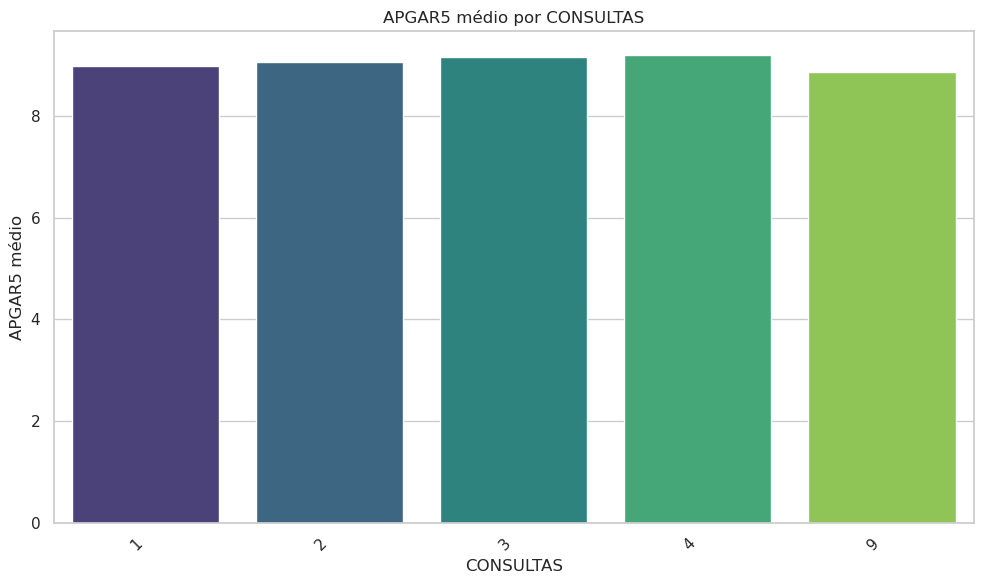

In [12]:
# Agrupando os dados pela variável CONSULTAS e calculando a média do APGAR5
avg_apgar5_by_consultas = df.groupby('CONSULTAS')['APGAR5'].mean().reset_index()

# Ordenando os dados pela média do APGAR5
avg_apgar5_by_consultas = avg_apgar5_by_consultas.sort_values(by='APGAR5', ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='CONSULTAS', y='APGAR5', data=avg_apgar5_by_consultas, palette='viridis')
plt.title('APGAR5 médio por CONSULTAS')
plt.xlabel('CONSULTAS')
plt.ylabel('APGAR5 médio')
plt.xticks(rotation=45, ha='right')  # Rotacionando os rótulos do eixo x para facilitar a leitura
plt.tight_layout()
plt.show()


####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

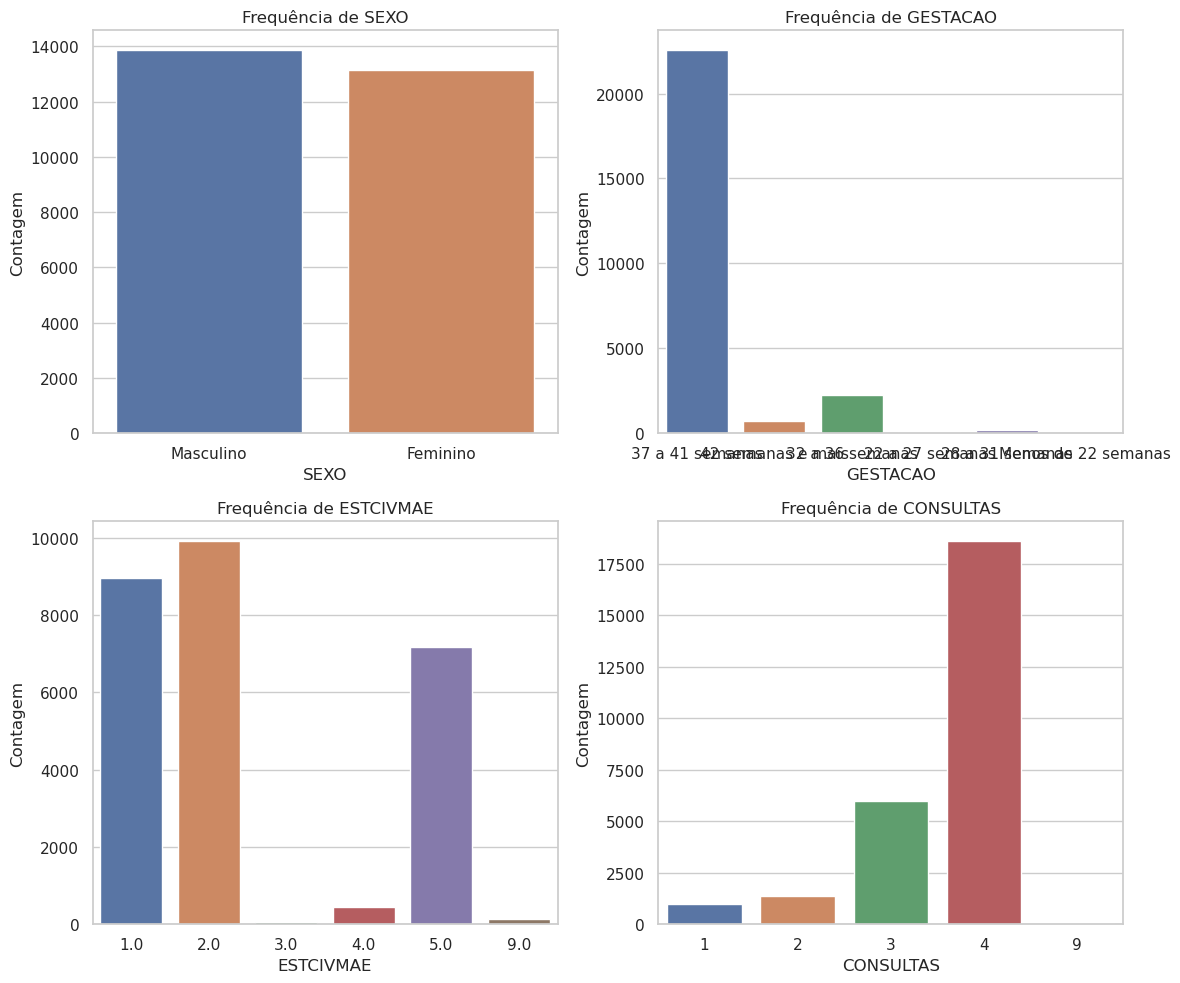

In [13]:
# Definindo o estilo do seaborn
sns.set(style="whitegrid")

# Definindo a quantidade de colunas no subplot
num_colunas = 2

# Definindo a quantidade de linhas no subplot
num_linhas = 2

# Criando uma figura e uma grade de subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(12, 10))

# Criando gráficos de barras para cada variável
variaveis = ['SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']
for i, var in enumerate(variaveis):
    linha = i // num_colunas
    coluna = i % num_colunas
    ax = sns.countplot(x=var, data=df, ax=axs[linha, coluna])
    ax.set_title(f'Frequência de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Contagem')

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()
